# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from Agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


env = UnityEnvironment(file_name="Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Intialize the Agent
Initialize the Deep Q Learning agent with the state_size, action_size and default seed


In [4]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### Training the agent


Episode 100	Avg Score: 1.65
Episode 200	Avg Score: 6.46
Episode 300	Avg Score: 12.69
Episode 400	Avg Score: 13.73
Episode 500	Avg Score: 15.76
Episode 600	Avg Score: 16.02
Episode 700	Avg Score: 15.91
Episode 800	Avg Score: 15.76
Episode 900	Avg Score: 16.45
Episode 1000	Avg Score: 16.73
Environment completed in 900 episodes.	Avg Score: 16.73


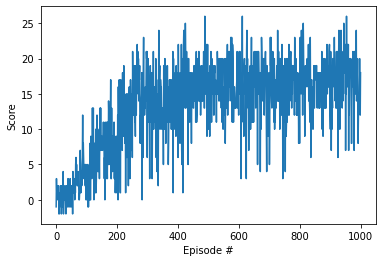

In [5]:
scores = []                                             # scores for all runs 
scores_window = deque(maxlen=100)                       # rolling window of scores
n_episodes = 1000                                       # number of max epsiodes to try
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995
eps = eps_start
for i_episode in range(1, n_episodes +1 ):              # iterate over n_episodes in order to train the agent
    env_info = env.reset(train_mode=True)[brain_name]   # reset the environment
    state = env_info.vector_observations[0]             # get the current state
    score = 0                                           # initialize the score
    run = 0
    while True:
        run +=1                                             # increment run number 
        eps = max(eps_end, eps_decay*eps)                            # get epsilon value 
        action = agent.get_action(state,eps )               # select an action
        env_info = env.step(int(action))[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]        # get the next state
        reward = env_info.rewards[0]                        # get the reward
        done = env_info.local_done[0]                       # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                     # update the score
        state = next_state                                  # roll over the state to next time step
        if done:
            # exit loop if episode finished
            break
    scores.append(score)
    scores_window.append(score)
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAvg Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if i_episode >=n_episodes :
        print('\rEnvironment completed in {:d} episodes.\tAvg Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
        break

# plot scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel("Episode #")
plt.show()

### Playback the trained agent
Load in the weights from the model which were generated from the previous training runs


In [6]:
agent.qnetwork_local.load_state_dict(torch.load('model.pt'))    # Load weights
env_info = env.reset(train_mode=False)[brain_name]              # reset the environment
state = env_info.vector_observations[0]                         # get the current state
score = 0                                                       # initialize the score
while True:
    action = agent.get_action(state)                            # select an action
    env_info = env.step(int(action))[brain_name]                # send the action to the environment
    next_state = env_info.vector_observations[0]                # get the next state
    reward = env_info.rewards[0]                                # get the reward
    done = env_info.local_done[0]                               # see if episode has finished
    score += reward                                             # update the score
    state = next_state                                          # roll over the state to next time step
    if done:                                                    # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0


### Close out the Environment

In [7]:
env.close()